# Linear Multiple Regression 

Generare un modello per prevedere l'andamento di una variabile dipendente da altre n variabili.

Ad esempio le vendite di un'azienda potrebbero essere direttamente correlate alle spese per la pubblicità, indirettamente correlate al prezzo, direttamente correlate al prezzo di beni alternativi. 

### Training set Test set

Per poter capire la validità del modello creato dal machine learning devo dividere a monte il dataframe in modo da tenere una parte di dati che non vanno a influire nella creazione del modello 
> Si devono prendere porzioni di df distribuiti in tutta la sua estensione in modo da non falsare il modello nel caso ci sia una tendenza dei dati in una porzione specifica del df

Una volta creato il modello, posso andare a confrontare i valori previsti con quelli reali

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Dataframe

Creo dataframe pandas partendo da .csv usando il metodo read_csv

In [4]:

start_df = pd.read_csv("https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Startup.csv")
cmp_df = pd.read_csv("https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Company.csv")
cmp_df
start_df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


## Feature / target

Per ogni dataframe individuo il target e lo separo dalla feature, nel caso dello "startup" il target sarà la colonna profit mentre per il "company" sarà la colonna Sales.

Questo vuol dire che dai dati contenuti nella feature cerco di trovare la migliore relazione lineare che mi restituisce la target. Per il company dai valori di TV Radio e Newspaper creco la relazione lineare che mi ritorna le Sales

In [5]:
startX = start_df.drop(columns="Profit")
cmpX = cmp_df.drop(columns="Sales")
starty = start_df["Profit"]
cmpy = cmp_df["Sales"]

## Split 

Divido sia feature che target in 2 parti, la parte di train verrà usata per definire il modello, la parte test verrà usata per verificare l'aderenza del modello calcolato, ai dati reali.

>Il parametro random_state è il seed random che va a decidere quali righe andare a selezionare; questo serve a poter usare lo stesso split per diversi dataframe e avere dei risultati sull'accuratezza del modello, paragonabili.

>il parametro test_size definisce la dimensione del campione di test, si passa un float < 1 che rappresenta la percentuale sul dataframe
 

In [6]:
X_train_start, X_test_start, y_train_start, y_test_start = train_test_split(startX, starty, test_size = 0.2, random_state=42)

X_train_cmp, X_test_cmp, y_train_cmp, y_test_cmp = train_test_split(cmpX, cmpy, test_size = 0.2, random_state=42)


In [7]:
start_model = LinearRegression()
start_model.fit(X_train_start, y_train_start)
cmp_model = LinearRegression()
cmp_model.fit(X_train_cmp, y_train_cmp)

LinearRegression()

### Dataframe Startup

#### Heatmap matrice correlazione

per avere un'idea di quali variabili mostrano correlazione e quali tendono a essere scorrelati

<Axes: >

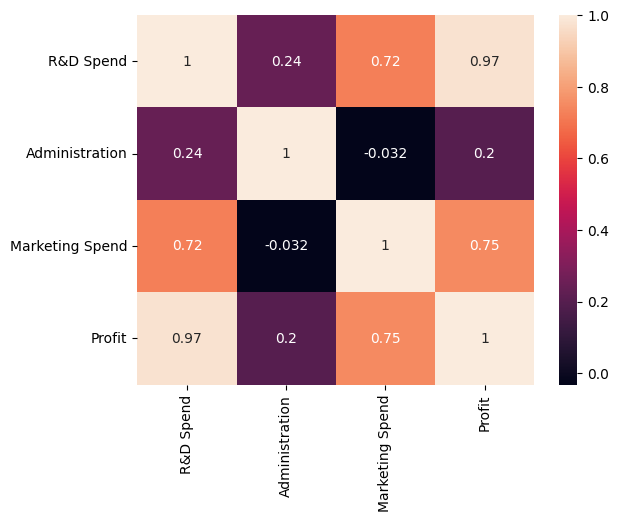

In [8]:
corr_start = start_df.corr()
sns.heatmap(corr_start, annot=True)

In [9]:
start_model.coef_
start_model.intercept_

eq_start = f"Sales = {start_df.columns[0]} * {start_model.coef_[0]} + {start_df.columns[1]} * {start_model.coef_[1]} + {start_df.columns[2]} * {start_model.coef_[2]} + {start_model.intercept_}"
eq_start


'Sales = R&D Spend * 0.8037792756297524 + Administration * -0.06792917400149973 + Marketing Spend * 0.031241545897732932 + 54071.87574599082'

In [10]:
start_length = y_test_start.shape[0]
predicted_start = start_model.predict(X_test_start)
y_test_start.array - predicted_start

<PandasArray>
[ 7604.3228353924205,  -3888.990815556419,  1044.1718402648403,
  18424.371849640112, -3758.0273438091244, -15319.284862610228,
  -3283.013657801246,   6525.875854598824,  -272.7563862867828,
   9670.707077744024]
Length: 10, dtype: float64

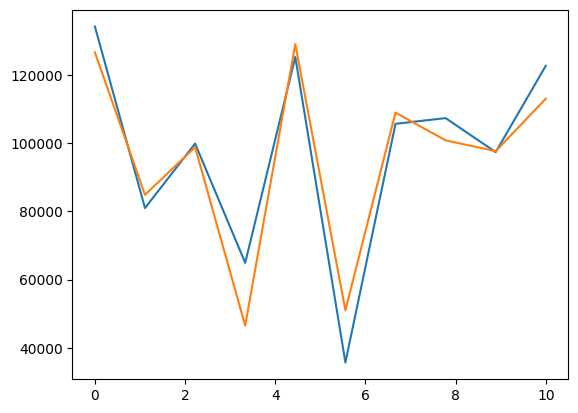

In [11]:
fig = plt.figure()
plt.plot(np.linspace(0, start_length, num=start_length), y_test_start, label="Real Profit")
plt.plot(np.linspace(0, start_length, num=start_length), predicted_start, label="Predicted Profit")

In [12]:
predicted_cmp = cmp_model.predict(X_test_cmp)
cmp_length = predicted_cmp.shape[0] 
cmp_length


40

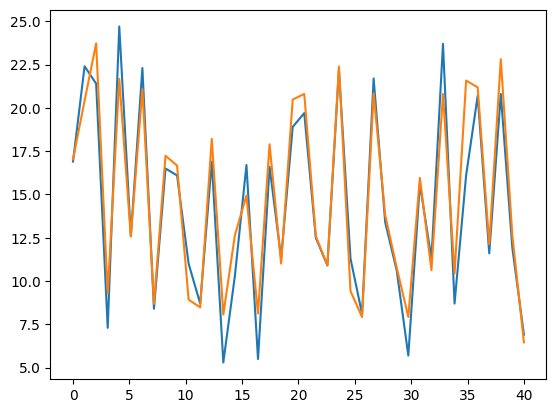

In [13]:
fig1 = plt.figure()
plt.plot(np.linspace(0, cmp_length, num=cmp_length), y_test_cmp, label="Real Sales")
plt.plot(np.linspace(0, cmp_length, num=cmp_length), predicted_cmp, label="Predicted Sales")

# Classificazione

Nel caso il target non sia una variabile continua, il problema diventa di classificazione ovvero di appartenenza a una "classe"


### Pair Plot 
metodo di seaborn che crea una specie di matrice di grafici che mostra tutte le colonne graficate una rispetto all'altra
parametro hue per evidenziare i colori delle 

### Coordinate Plot

permette di visualizzare n variabili in 2d. Molto utile per capire quali variabili sono più utili per classificare 

## Logistic Regression

modello matematico che permettte di classificare le osservazioni




## dataset
prendiamo il dataset iris che sta in [https://archive.ics.uci.edu/ml/machine-learning-databases/iris/](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/) considerato come l'"hello world" del ML 


In [15]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", sep=',', header=None)
iris


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


>*n.b.*:
>header none serve per non perdere la prima riga di dati, l'header andrà inserito dopo




In [18]:
iris.columns = ["sepal length","sepal width","petal length","petal width","class"] # assegno la lista di stringhe che sono i nomi delle colonne
#iris.to_csv("./streamlitApp/dataframe_iris.csv")
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Pair plot

non ha bisogno di plt figure, genera tutto con seaborn

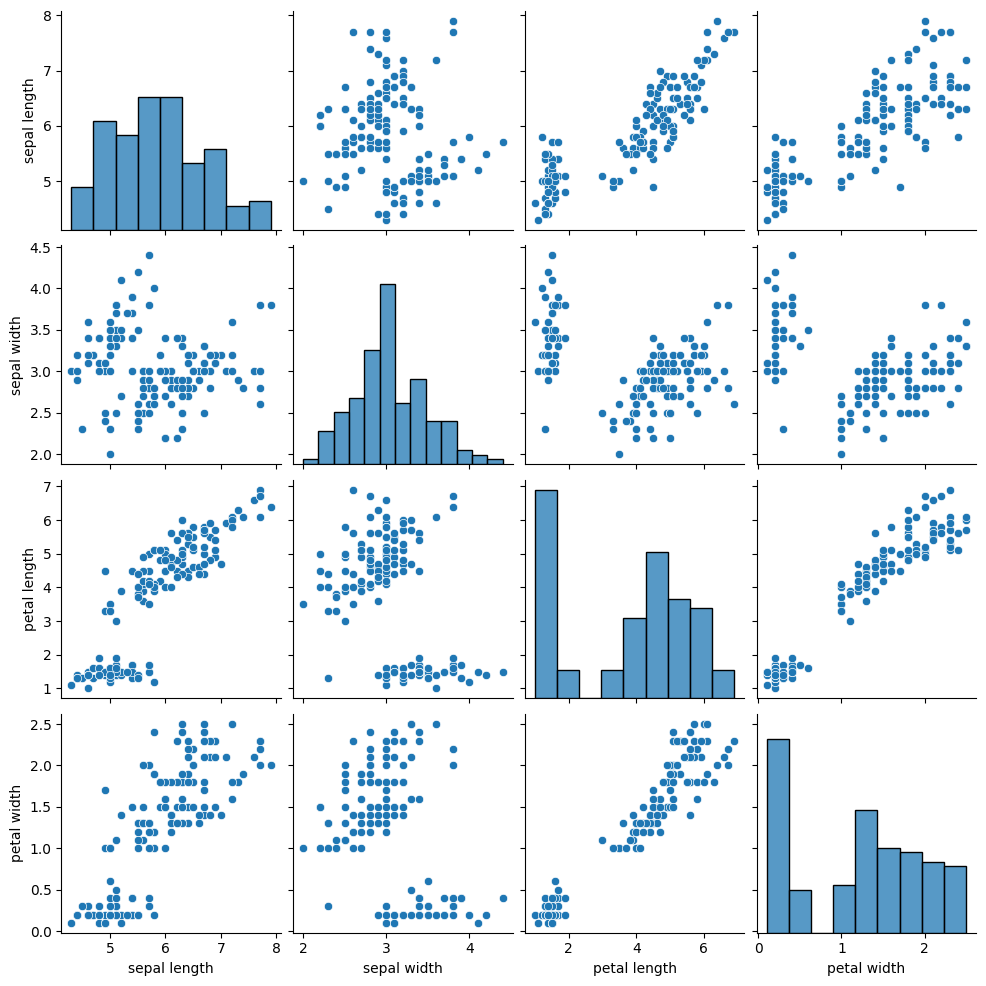

In [19]:
sns.pairplot(iris)

## Bello...

ma serve a poco perchè non capisco la divisione delle classi 

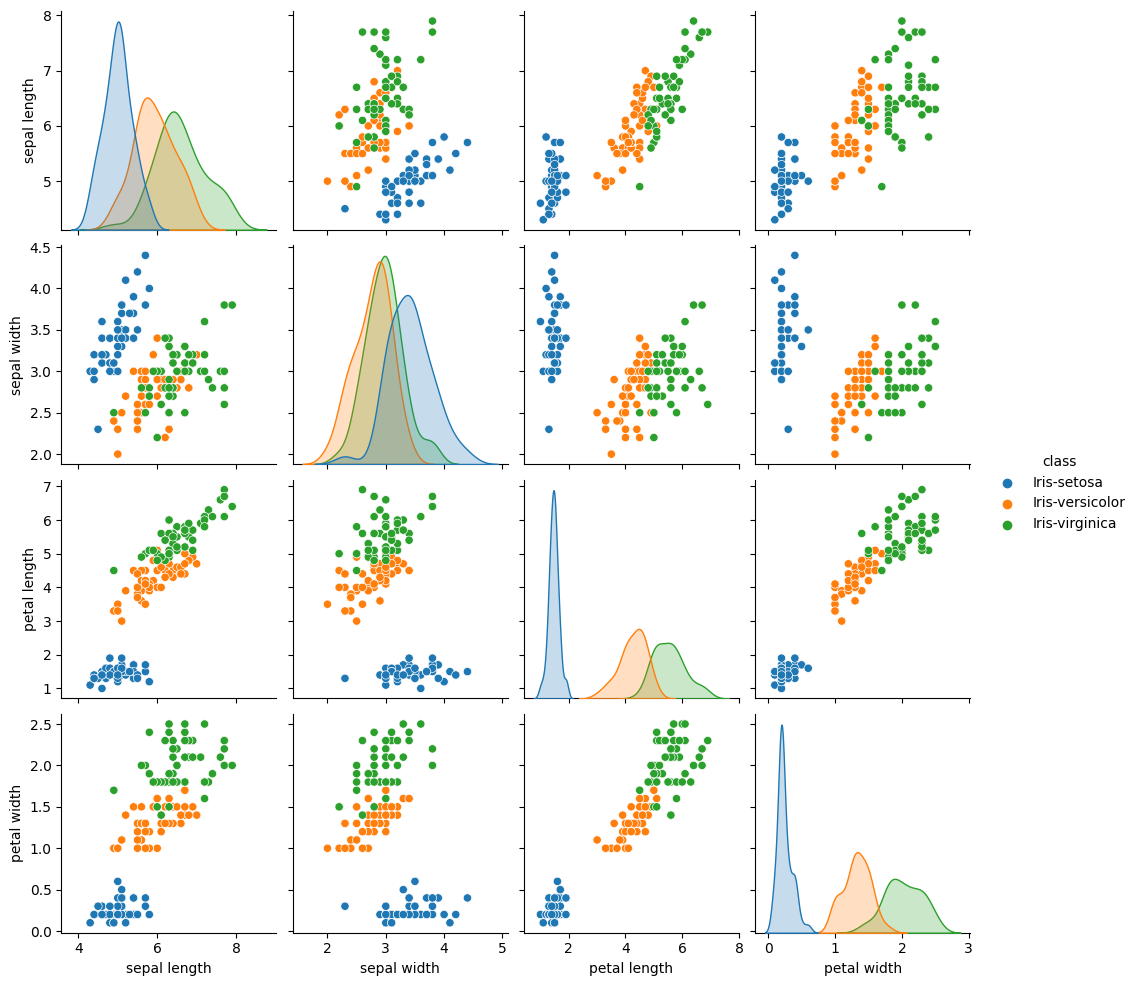

In [20]:
sns.pairplot(iris, hue="class")

## hue="class"

assegna un colore diverso per ogni elemento presente in class

### Visualizzazione 

pairplot è una matrice di grafici in cui ogni variabile viene mostrata rispetto all'altra. Nella diagonale principale si trovano le frequenze delle osservazioni.
Questo tipo di grafico è molto utile per farsi un'idea *"a occhio"* di come sono distribuiti i valori delle classi

In [21]:
# Feature 
X = iris.drop(columns="class")
#X.to_csv()
# Target
y = iris["class"]

In [22]:
# train set e data set 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)


### Feature Target

ho separato il dataset per isolare il target dalla feature, quindi ho generato il train set e il test set.
**ora posso creare il modello usando logistic regression**

In [23]:
#modello 
iris_mod = LogisticRegression()
iris_mod.fit(X_train, y_train)

LogisticRegression()

In [24]:
iris_mod.predict_proba(X_test) # probabilità per ogni fiore osservato che appartenga a ciascuna classe
proba= iris_mod.predict_proba(X_test)
proba

array([[4.27889666e-03, 8.24220010e-01, 1.71501093e-01],
       [9.44022142e-01, 5.59771191e-02, 7.39239068e-07],
       [2.21661658e-08, 2.72416339e-03, 9.97275814e-01],
       [7.13256906e-03, 7.77803256e-01, 2.15064175e-01],
       [1.71818721e-03, 7.60762201e-01, 2.37519612e-01],
       [9.52482790e-01, 4.75166117e-02, 5.98157745e-07],
       [8.09167296e-02, 8.99603016e-01, 1.94802545e-02],
       [1.97517380e-04, 1.49622355e-01, 8.50180127e-01],
       [2.61625894e-03, 7.81631948e-01, 2.15751793e-01],
       [3.03162257e-02, 9.38492752e-01, 3.11910228e-02],
       [5.20496246e-04, 2.36499785e-01, 7.62979719e-01],
       [9.63944044e-01, 3.60557186e-02, 2.37173431e-07],
       [9.70680481e-01, 2.93193912e-02, 1.27898469e-07],
       [9.57338978e-01, 4.26606836e-02, 3.38236063e-07],
       [9.76968637e-01, 2.30311150e-02, 2.47668528e-07],
       [4.99441321e-03, 6.73416863e-01, 3.21588723e-01],
       [1.16495734e-05, 3.09911506e-02, 9.68997200e-01],
       [2.88450806e-02, 9.43458

## Risultato del modello 

Il modello ci ritorna una matrice (quindi un array di vettori) in cui ogni riga contiene la probabilità che il fiore osservato appartenga alla classe. Quindi è una matrice che avrà tante righe quanti sono i fiori osservati e tante colonne quante sono le classi.
>*n.b.:* infatti la somma degli elementi di una qualsiasi riga di predict_proba(X) è 1 perché rappresenta la probabilità che un fiore appartenga a una qualsiasi delle classi possibili


In [25]:
somma = 0
for j in proba[30]: #una riga a caso del predicted
    somma += j
somma # somma farà sempre 1 (a meno di approssimazio j)

1.0000000000000002